<a href="https://colab.research.google.com/github/nico89h/TrabajoFinal-MN2-Grupo3/blob/main/TrabajoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Se realiza una funcion de cada ecuacion para su uso posterior

In [1]:
def d_presa(x, y, alpha, c1):
    """
    dx/dt: La tasa de cambio de la población de presas.
    x: Población actual de presas
    y: Población actual de depredadores
    alpha: Tasa de crecimiento de presas (α)
    c1: Tasa de depredación (c₁)
    """
    dx_dt = x * (alpha - c1 * y)
    return dx_dt

def d_depredador(x, y, beta, c2):
    """
    dy/dt: La tasa de cambio de la población de depredadores.
    x: Población actual de presas
    y: Población actual de depredadores
    beta: Tasa de mortalidad de depredadores (β)
    c2: Tasa de crecimiento de depredadores por caza (c₂)
    """
    dy_dt = y * (-beta + c2 * x)
    return dy_dt

Inicio de Metodos para la resolucion aproximada de las ecuaciones diferenciales

In [5]:
def rk4(x0, y0, tiempo, h, alpha, c1, beta, c2):
  y = array()
  x = array()
  x[0]=x0
  y[0]=y0
  pasos = int(tiempo/h)
  for i in range(pasos):
    k1_presa = d_presa(x[i], y[i], alpha, c1)
    k1_depredador = d_depredador(x[i], y[i], beta, c2)

    k2_presa= d_presa(x[i]+ h / 2, y[i] + (h *k1_presa)/2, alpha, c1)
    k2_depredador= d_depredador(x[i]+ h / 2, y[i] + (h *k1_depredador)/2, beta, c2)

  end;

In [3]:
def resolver_rk4_custom(x0, y0, t_total, pasos, alpha, c1, beta, c2):
    dt = t_total / pasos
    t_values = np.linspace(0, t_total, pasos + 1)

    # Arrays para guardar las soluciones
    x = np.zeros(pasos + 1)
    y = np.zeros(pasos + 1)

    # Condiciones iniciales
    x[0] = x0
    y[0] = y0

    # Bucle RK4
    for i in range(pasos):
        xi = x[i]
        yi = y[i]

        # --- K1: Pendientes al inicio del intervalo ---
        # AQUI llamamos a tus funciones originales
        k1_x = d_presa(xi, yi, alpha, c1)
        k1_y = d_depredador(xi, yi, beta, c2)

        # --- K2: Pendientes en el punto medio (usando K1) ---
        x_mid1 = xi + 0.5 * dt * k1_x
        y_mid1 = yi + 0.5 * dt * k1_y
        k2_x = d_presa(x_mid1, y_mid1, alpha, c1)
        k2_y = d_depredador(x_mid1, y_mid1, beta, c2)

        # --- K3: Pendientes en el punto medio (usando K2) ---
        x_mid2 = xi + 0.5 * dt * k2_x
        y_mid2 = yi + 0.5 * dt * k2_y
        k3_x = d_presa(x_mid2, y_mid2, alpha, c1)
        k3_y = d_depredador(x_mid2, y_mid2, beta, c2)

        # --- K4: Pendientes al final del intervalo (usando K3) ---
        x_end = xi + dt * k3_x
        y_end = yi + dt * k3_y
        k4_x = d_presa(x_end, y_end, alpha, c1)
        k4_y = d_depredador(x_end, y_end, beta, c2)

        # --- Actualización final (Promedio ponderado) ---
        x[i+1] = xi + (dt / 6.0) * (k1_x + 2*k2_x + 2*k3_x + k4_x)
        y[i+1] = yi + (dt / 6.0) * (k1_y + 2*k2_y + 2*k3_y + k4_y)

    return t_values, x, y

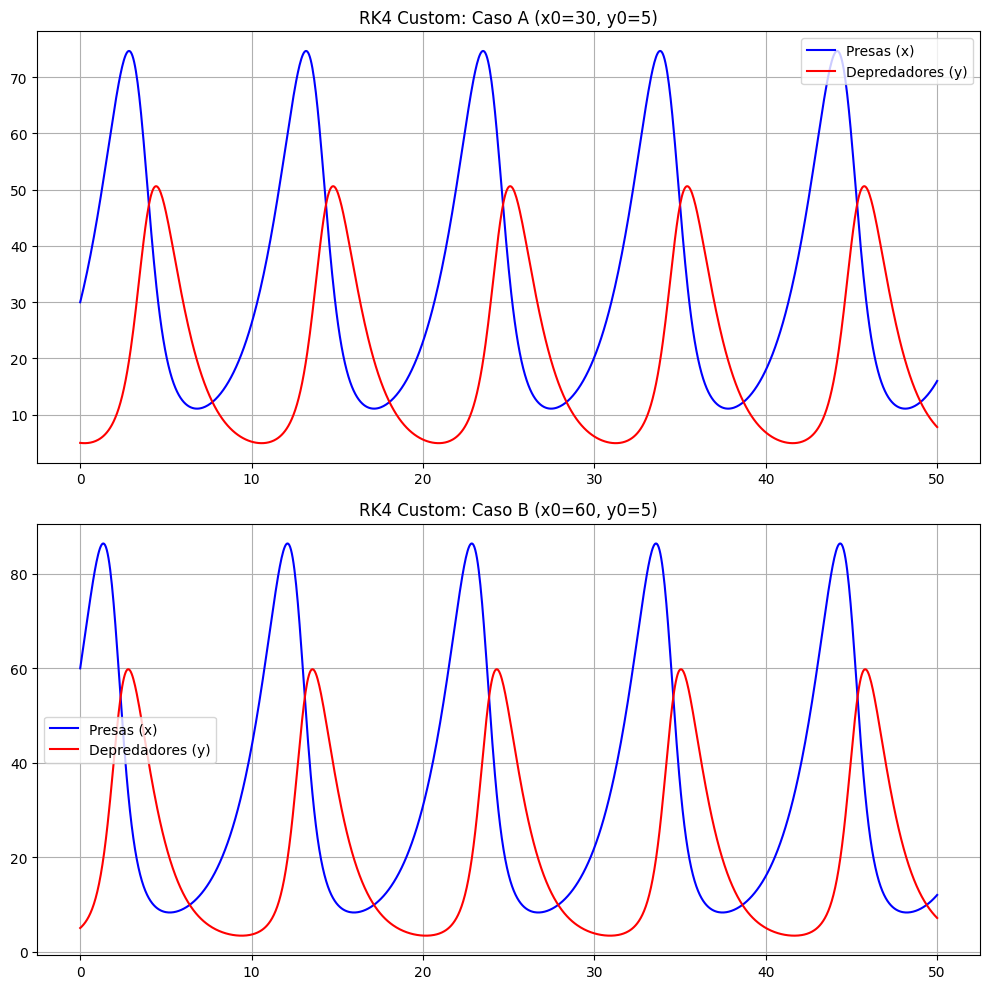

In [4]:
alpha = 0.55
c1 = 0.028
beta = 0.8
c2 = 0.024
tiempo = 50
pasos = 1000 # Un paso (h) de 0.05

# CASO A: Inicio Normal
t, xa, ya = resolver_rk4_custom(30, 5, tiempo, pasos, alpha, c1, beta, c2)

# CASO B: Doble de presas
t, xb, yb = resolver_rk4_custom(60, 5, tiempo, pasos, alpha, c1, beta, c2)

# --- 4. GRAFICAR ---
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Grafico Caso A
ax1.plot(t, xa, label='Presas (x)', color='blue')
ax1.plot(t, ya, label='Depredadores (y)', color='red')
ax1.set_title('RK4 Custom: Caso A (x0=30, y0=5)')
ax1.grid(True)
ax1.legend()

# Grafico Caso B
ax2.plot(t, xb, label='Presas (x)', color='blue')
ax2.plot(t, yb, label='Depredadores (y)', color='red')
ax2.set_title('RK4 Custom: Caso B (x0=60, y0=5)')
ax2.grid(True)
ax2.legend()

plt.tight_layout()
plt.show()